In [1]:
from functions import *

In [2]:
n = 5
T = 0.1

In [3]:
def plot_ra_schedule(ramp_up_schedule):
    schedule = np.concatenate((ramp_up_schedule, ramp_up_schedule[::-1][1:]))
    n_points = len(schedule)
    plt.plot(np.linspace(0,1,n_points), schedule, '.--', color = red)
    plt.xlabel('s')
    plt.ylabel('$\gamma(s)$')
    plt.title('$H(\gamma) = \gamma H_{prob} + (1-\gamma) H_{mix}$')
    plt.show()

In [4]:
def get_proposal_mat_ra(m, ramp_up_schedule, t_max):
    H_ising = np.diag(m.E_rescaled)
    H_mixer = H_mixer_list[m.n-1]
    d = int(2**m.n)

    def s(t): return t/t_max

    def f(s, ramp_up_schedule):
        schedule = np.concatenate([ramp_up_schedule, ramp_up_schedule[::-1][1:]])
        n_points = len(schedule)
        times = np.linspace(0, 1, n_points)
        time_step = 1 / (n_points - 1)

        # Check if s is outside the range of the points
        if s < 0 or s > 1:
            raise ValueError("t is out of the bounds")

        # Find the correct interval for x
        for i in range(n_points - 1):
            if times[i] <= s <= times[i+1]:
                # Extract points (x0, y0) and (x1, y1)
                y0 = schedule[i]
                s0 = times[i]
                y1 = schedule[i + 1]
                # Linear interpolation formula
                return y0 + (y1 - y0) * (s - s0) / time_step

    def hamiltonian(t): return (1-f(s(t), ramp_up_schedule))*H_ising + f(s(t), ramp_up_schedule)*H_mixer

    def tdse_U(t, U): 
        return -1j*(hamiltonian(t)@U.reshape(d,d)).flatten()
    
    U0 = np.eye(d, dtype=complex).flatten()
    sol = solve_ivp(tdse_U, 
                    [0, t_max], 
                    y0=U0, 
                    rtol=1e-10, 
                    method='RK23')
    
    U_t = sol.y.T[-1].reshape(d,d)
    return np.abs(U_t)**2

In [5]:
def loss(ramp_up_schedule, t_max = 10):
    delta_avg = 0
    n_random_models = 10
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, ramp_up_schedule, t_max)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_avg += get_delta(P) / n_random_models
    return -delta_avg

Initial spectral gap =  0.0484


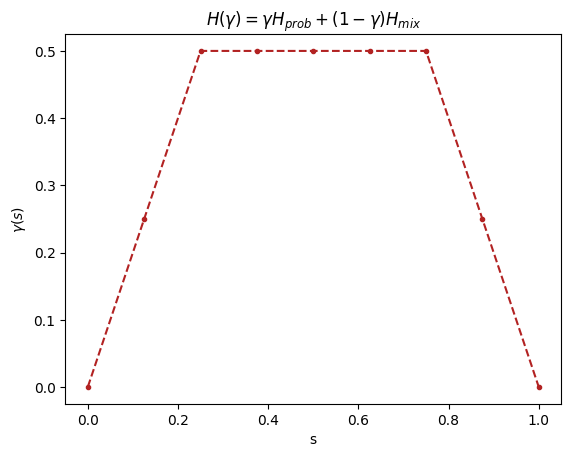

In [6]:
f_max = 0.5
t_max = 10
ramp_up_schedule_init = np.concatenate([np.linspace(0, f_max, 3), np.ones(2)*f_max])

loss_init = loss(ramp_up_schedule_init)
print('Initial spectral gap = ', -loss_init.round(4))
plot_ra_schedule(ramp_up_schedule_init)

In [7]:
res = minimize(loss, 
               ramp_up_schedule_init, 
               method='COBYLA',
               options={"disp":True, "maxiter":200})   


   Return from subroutine COBYLA because the MAXFUN limit has been reached.



   NFVALS =  200   F =-1.132836E-01    MAXCV = 0.000000E+00
   X =-7.163783E-02   1.459410E-01   2.766685E-01   8.515402E-01   1.336572E+00


In [8]:
res_finetuned = minimize(loss, 
                         res.x, 
                         method='L-BFGS-B',
                         options={"disp":True, "maxiter":200})   

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13284D-01    |proj g|=  7.28258D-02


 This problem is unconstrained.



At iterate    1    f= -1.16266D-01    |proj g|=  3.87363D-01



At iterate    2    f= -1.22549D-01    |proj g|=  2.00577D-01



At iterate    3    f= -1.23238D-01    |proj g|=  1.05085D-01



At iterate    4    f= -1.23656D-01    |proj g|=  2.46256D-01



At iterate    5    f= -1.24688D-01    |proj g|=  1.32810D-01



At iterate    6    f= -1.26709D-01    |proj g|=  1.36472D-01



At iterate    7    f= -1.27899D-01    |proj g|=  1.29108D-01



At iterate    8    f= -1.27916D-01    |proj g|=  1.23107D-01



At iterate    9    f= -1.28821D-01    |proj g|=  1.22442D-01



At iterate   10    f= -1.29524D-01    |proj g|=  1.36284D-01



At iterate   11    f= -1.29549D-01    |proj g|=  8.53126D-02



At iterate   12    f= -1.29601D-01    |proj g|=  1.19006D-01



At iterate   13    f= -1.29635D-01    |proj g|=  1.59583D-01



At iterate   14    f= -1.29658D-01    |proj g|=  1.13160D-01



At iterate   15    f= -1.29680D-01    |proj g|=  1.31748D-01



At iterate   16    f= -1.29707D-01    |proj g|=  8.05507D-02



At iterate   17    f= -1.30064D-01    |proj g|=  8.01989D-02



At iterate   18    f= -1.30075D-01    |proj g|=  8.15676D-02



At iterate   19    f= -1.30079D-01    |proj g|=  1.27035D-01



At iterate   20    f= -1.30104D-01    |proj g|=  1.11459D-01



At iterate   21    f= -1.30124D-01    |proj g|=  1.74738D-01



At iterate   22    f= -1.30148D-01    |proj g|=  1.44570D-01



At iterate   23    f= -1.30160D-01    |proj g|=  1.22659D-01



At iterate   24    f= -1.30166D-01    |proj g|=  1.36078D-01



At iterate   25    f= -1.30172D-01    |proj g|=  1.15034D-01



At iterate   26    f= -1.30180D-01    |proj g|=  1.06764D-01



At iterate   27    f= -1.30180D-01    |proj g|=  1.06872D-01



At iterate   28    f= -1.30180D-01    |proj g|=  1.13948D-01



At iterate   29    f= -1.30182D-01    |proj g|=  7.42696D-02



At iterate   30    f= -1.30186D-01    |proj g|=  1.02624D-01



At iterate   31    f= -1.30191D-01    |proj g|=  2.01866D-01



At iterate   32    f= -1.30191D-01    |proj g|=  2.00768D-01



At iterate   33    f= -1.30192D-01    |proj g|=  8.63611D-02



At iterate   34    f= -1.30192D-01    |proj g|=  8.34822D-02



At iterate   35    f= -1.30192D-01    |proj g|=  7.75333D-02



At iterate   36    f= -1.30193D-01    |proj g|=  8.51218D-02



At iterate   37    f= -1.30193D-01    |proj g|=  9.25095D-02



At iterate   38    f= -1.30193D-01    |proj g|=  9.37848D-02



At iterate   39    f= -1.30193D-01    |proj g|=  9.77855D-02



At iterate   40    f= -1.30193D-01    |proj g|=  8.19236D-02



At iterate   41    f= -1.30193D-01    |proj g|=  2.17918D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41    118      1     0     0   2.179D-01  -1.302D-01
  F = -0.13019318519325560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


Optimized spectral gap =  0.1133


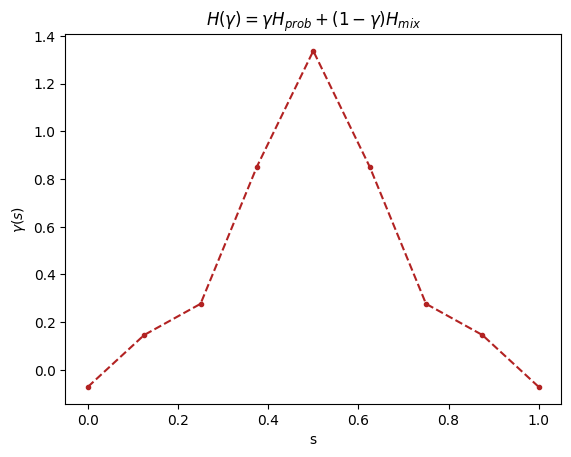

In [9]:
loss_opt = loss(res.x)
print('Optimized spectral gap = ', -loss_opt.round(4))
plot_ra_schedule(res.x)

In [10]:
res.x

array([-0.07163783,  0.14594105,  0.27666849,  0.85154017,  1.33657181])